In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.proportion import proportion_confint
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the datasets
ir = pd.read_csv("C:/Users/ullas/Documents/Kalyani/da_sem1_ca1_rep/Datasets/ireland_public_transport.csv")
uk = pd.read_csv("C:/Users/ullas/Documents/Kalyani/da_sem1_ca1_rep/Datasets/uk_public_transport.csv")

In [3]:
ir.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,NaN
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0


In [4]:
uk.head()

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,NaN,NaN,NaN
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,NaN,NaN,NaN
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,NaN,NaN,NaN
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,NaN,NaN,NaN
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,NaN,NaN,NaN


In [5]:
pd.set_option('display.max_rows', None)
print(ir)

     STATISTIC     Statistic Label TLIST(W1)          Week  C03935V04687  \
0     THA25C01  Passenger Journeys   2019W01  2019 Week 01            10   
1     THA25C01  Passenger Journeys   2019W01  2019 Week 01            20   
2     THA25C01  Passenger Journeys   2019W01  2019 Week 01            30   
3     THA25C01  Passenger Journeys   2019W01  2019 Week 01            40   
4     THA25C01  Passenger Journeys   2019W02  2019 Week 02            10   
5     THA25C01  Passenger Journeys   2019W02  2019 Week 02            20   
6     THA25C01  Passenger Journeys   2019W02  2019 Week 02            30   
7     THA25C01  Passenger Journeys   2019W02  2019 Week 02            40   
8     THA25C01  Passenger Journeys   2019W03  2019 Week 03            10   
9     THA25C01  Passenger Journeys   2019W03  2019 Week 03            20   
10    THA25C01  Passenger Journeys   2019W03  2019 Week 03            30   
11    THA25C01  Passenger Journeys   2019W03  2019 Week 03            40   
12    THA25C

In [6]:
pd.set_option('display.max_rows', None)
print(uk)

    Period and Financial year  Reporting Period  Days in period  \
0                    01_10/11                 1              31   
1                    02_10/11                 2              28   
2                    03_10/11                 3              28   
3                    04_10/11                 4              28   
4                    05_10/11                 5              28   
5                    06_10/11                 6              28   
6                    07_10/11                 7              28   
7                    08_10/11                 8              28   
8                    09_10/11                 9              28   
9                    10_10/11                10              28   
10                   11_10/11                11              28   
11                   12_10/11                12              28   
12                   13_10/11                13              26   
13                   01_11/12                 1              3

In [7]:
#Checking for missing values
print("Missing values:\n", ir.isnull().sum())

Missing values:
 STATISTIC             0
Statistic Label       0
TLIST(W1)             0
Week                  0
C03935V04687          0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64


In [8]:
#Checking for missing values
print("Missing values:\n", uk.isnull().sum())

Missing values:
 Period and Financial year         0
Reporting Period                  0
Days in period                    0
Period beginning                  0
Period ending                     0
Bus journeys (m)                  0
Underground journeys (m)          0
DLR Journeys (m)                  0
Tram Journeys (m)                 0
Overground Journeys (m)           7
London Cable Car Journeys (m)    29
TfL Rail Journeys (m)            66
dtype: int64


In [9]:
#Descriptive Statistics
ir.describe()

,C03935V04687,VALUE
count,1024.000000,9.600000e+02
mean,25.000000,1.740812e+06
std,11.185803,1.423490e+06
min,10.000000,2.323100e+04
25%,17.500000,6.121042e+05
50%,25.000000,9.495040e+05
75%,32.500000,2.982254e+06
max,40.000000,5.488658e+06


In [10]:
#Descriptive Statistics
uk.describe()

,Reporting Period,Days in period,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),London Cable Car Journeys (m),TfL Rail Journeys (m)
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,169.000000,147.000000,110.000000
mean,6.880682,28.085227,159.324432,88.750000,7.598864,1.997159,11.343787,0.110204,5.070909
std,3.745088,0.657795,35.304410,24.103105,1.895408,0.458872,3.490954,0.059374,3.908667
min,1.000000,26.000000,30.200000,5.700000,1.200000,0.400000,1.000000,0.000000,0.600000
25%,4.000000,28.000000,145.050000,84.475000,6.500000,1.700000,8.900000,0.100000,3.225000
50%,7.000000,28.000000,173.800000,94.100000,7.700000,2.200000,11.600000,0.100000,3.750000
75%,10.000000,28.000000,182.550000,105.300000,9.200000,2.300000,14.300000,0.100000,4.600000
max,13.000000,31.000000,207.500000,118.200000,10.600000,2.800000,17.800000,0.500000,17.300000


# Dealing with missing values and cleaning the data in Ireland Data

In [11]:
# Filling missing values in VALUE column with the mean
ir['VALUE'].fillna(ir['VALUE'].mean(), inplace=True)

In [12]:
ir['VALUE'] = ir['VALUE'].astype(int)

In [13]:
# Verifying that missing values have been delt with
print("Missing values after filling:\n", ir.isnull().sum())

Missing values after filling:
 STATISTIC            0
Statistic Label      0
TLIST(W1)            0
Week                 0
C03935V04687         0
Mode of Transport    0
UNIT                 0
VALUE                0
dtype: int64


In [14]:
ir.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,1740811
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579


In [15]:
# Dropping unnecessary columns
columns_to_drop = ['STATISTIC', 'Statistic Label', 'TLIST(W1)', 'C03935V04687', 'UNIT']
ir = ir.drop(columns=columns_to_drop)

In [16]:
print("DataFrame after dropping columns:\n", ir)

DataFrame after dropping columns:
               Week                     Mode of Transport    VALUE
0     2019 Week 01                      Dublin Metro Bus  1987891
1     2019 Week 01           Bus, excluding Dublin Metro   497598
2     2019 Week 01                                  Rail  1740811
3     2019 Week 01  All public transport, excluding LUAS  2485489
4     2019 Week 02                      Dublin Metro Bus  2709579
5     2019 Week 02           Bus, excluding Dublin Metro   633764
6     2019 Week 02                                  Rail  1740811
7     2019 Week 02  All public transport, excluding LUAS  3343343
8     2019 Week 03                      Dublin Metro Bus  2784678
9     2019 Week 03           Bus, excluding Dublin Metro   678097
10    2019 Week 03                                  Rail  1740811
11    2019 Week 03  All public transport, excluding LUAS  3462775
12    2019 Week 04                      Dublin Metro Bus  2858346
13    2019 Week 04           Bus, excludi

In [17]:
# Keeping only rows where Mode of Transport is Bus, excluding Dublin Metro
ir = ir[ir['Mode of Transport'] == 'Bus, excluding Dublin Metro']

In [18]:
print("DataFrame after filtering:\n", ir)

DataFrame after filtering:
               Week            Mode of Transport    VALUE
1     2019 Week 01  Bus, excluding Dublin Metro   497598
5     2019 Week 02  Bus, excluding Dublin Metro   633764
9     2019 Week 03  Bus, excluding Dublin Metro   678097
13    2019 Week 04  Bus, excluding Dublin Metro   676140
17    2019 Week 05  Bus, excluding Dublin Metro   672440
21    2019 Week 06  Bus, excluding Dublin Metro   696573
25    2019 Week 07  Bus, excluding Dublin Metro   736594
29    2019 Week 08  Bus, excluding Dublin Metro   677931
33    2019 Week 09  Bus, excluding Dublin Metro   706297
37    2019 Week 10  Bus, excluding Dublin Metro   718505
41    2019 Week 11  Bus, excluding Dublin Metro   731042
45    2019 Week 12  Bus, excluding Dublin Metro   665202
49    2019 Week 13  Bus, excluding Dublin Metro   749734
53    2019 Week 14  Bus, excluding Dublin Metro   725196
57    2019 Week 15  Bus, excluding Dublin Metro   717874
61    2019 Week 16  Bus, excluding Dublin Metro   636735
65 

In [19]:
# Renaming rows with Bus, excluding Dublin Metro to Dublin Bus
ir['Mode of Transport'] = ir['Mode of Transport'].replace('Bus, excluding Dublin Metro', 'Ireland Bus')

In [20]:
print("DataFrame after renaming rows:\n", ir)

DataFrame after renaming rows:
               Week Mode of Transport    VALUE
1     2019 Week 01       Ireland Bus   497598
5     2019 Week 02       Ireland Bus   633764
9     2019 Week 03       Ireland Bus   678097
13    2019 Week 04       Ireland Bus   676140
17    2019 Week 05       Ireland Bus   672440
21    2019 Week 06       Ireland Bus   696573
25    2019 Week 07       Ireland Bus   736594
29    2019 Week 08       Ireland Bus   677931
33    2019 Week 09       Ireland Bus   706297
37    2019 Week 10       Ireland Bus   718505
41    2019 Week 11       Ireland Bus   731042
45    2019 Week 12       Ireland Bus   665202
49    2019 Week 13       Ireland Bus   749734
53    2019 Week 14       Ireland Bus   725196
57    2019 Week 15       Ireland Bus   717874
61    2019 Week 16       Ireland Bus   636735
65    2019 Week 17       Ireland Bus   601236
69    2019 Week 18       Ireland Bus   727961
73    2019 Week 19       Ireland Bus   650874
77    2019 Week 20       Ireland Bus   691221
81

In [21]:
# Converting Week column to datetime format
ir['Week'] = ir['Week'] + '-1'
ir['Week'] = pd.to_datetime(ir['Week'], format='%Y Week %U-%w')

In [22]:
ir = ir.rename(columns={'Week': 'Date'})

In [23]:
print(ir.columns)

Index(['Date', 'Mode of Transport', 'VALUE'], dtype='object')


In [24]:
# Converting the data into a monthly format to match UK data for further analysis
ir.set_index('Date', inplace=True)

monthly_data_ir = ir.resample('M').sum()

monthly_data_ir.reset_index(inplace=True)

monthly_data_ir['Date'] = monthly_data_ir['Date'] - pd.offsets.MonthBegin(1)

print(monthly_data_ir)

         Date    VALUE
0  2019-01-01  2485599
1  2019-02-01  2783538
2  2019-03-01  2821046
3  2019-04-01  3430775
4  2019-05-01  2771398
5  2019-06-01  2649806
6  2019-07-01  3520064
7  2019-08-01  2684969
8  2019-09-01  3902084
9  2019-10-01  3230737
10 2019-11-01  2988418
11 2019-12-01  3633236
12 2020-01-01  4357933
13 2020-02-01  2961831
14 2020-03-01  2412633
15 2020-04-01   363753
16 2020-05-01   488617
17 2020-06-01  1070214
18 2020-07-01  1350221
19 2020-08-01  1853837
20 2020-09-01  1717699
21 2020-10-01  1543419
22 2020-11-01  1395010
23 2020-12-01  1561818
24 2021-01-01   912557
25 2021-02-01   829573
26 2021-03-01  1245362
27 2021-04-01  1198532
28 2021-05-01  1874425
29 2021-06-01  1756319
30 2021-07-01  1822897
31 2021-08-01  2340740
32 2021-09-01  2255522
33 2021-10-01  2326457
34 2021-11-01  2898459
35 2021-12-01  1750997
36 2022-01-01  4214227
37 2022-02-01  2265562
38 2022-03-01  2313473
39 2022-04-01  2410445
40 2022-05-01  3341872
41 2022-06-01  2632033
42 2022-07-

In [25]:
monthly_data_ir = monthly_data_ir[monthly_data_ir['Date'] <= '2023-09-01']

# Display the updated dataframe
print(monthly_data_ir)

         Date    VALUE
0  2019-01-01  2485599
1  2019-02-01  2783538
2  2019-03-01  2821046
3  2019-04-01  3430775
4  2019-05-01  2771398
5  2019-06-01  2649806
6  2019-07-01  3520064
7  2019-08-01  2684969
8  2019-09-01  3902084
9  2019-10-01  3230737
10 2019-11-01  2988418
11 2019-12-01  3633236
12 2020-01-01  4357933
13 2020-02-01  2961831
14 2020-03-01  2412633
15 2020-04-01   363753
16 2020-05-01   488617
17 2020-06-01  1070214
18 2020-07-01  1350221
19 2020-08-01  1853837
20 2020-09-01  1717699
21 2020-10-01  1543419
22 2020-11-01  1395010
23 2020-12-01  1561818
24 2021-01-01   912557
25 2021-02-01   829573
26 2021-03-01  1245362
27 2021-04-01  1198532
28 2021-05-01  1874425
29 2021-06-01  1756319
30 2021-07-01  1822897
31 2021-08-01  2340740
32 2021-09-01  2255522
33 2021-10-01  2326457
34 2021-11-01  2898459
35 2021-12-01  1750997
36 2022-01-01  4214227
37 2022-02-01  2265562
38 2022-03-01  2313473
39 2022-04-01  2410445
40 2022-05-01  3341872
41 2022-06-01  2632033
42 2022-07-

In [26]:
monthly_data_ir

,Date,VALUE
0,2019-01-01,2485599
1,2019-02-01,2783538
2,2019-03-01,2821046
3,2019-04-01,3430775
4,2019-05-01,2771398
5,2019-06-01,2649806
6,2019-07-01,3520064
7,2019-08-01,2684969
8,2019-09-01,3902084
9,2019-10-01,3230737


# Dealing with missing values and cleaning the data in UK Data

In [27]:
print(uk)

    Period and Financial year  Reporting Period  Days in period  \
0                    01_10/11                 1              31   
1                    02_10/11                 2              28   
2                    03_10/11                 3              28   
3                    04_10/11                 4              28   
4                    05_10/11                 5              28   
5                    06_10/11                 6              28   
6                    07_10/11                 7              28   
7                    08_10/11                 8              28   
8                    09_10/11                 9              28   
9                    10_10/11                10              28   
10                   11_10/11                11              28   
11                   12_10/11                12              28   
12                   13_10/11                13              26   
13                   01_11/12                 1              3

In [28]:
# Filling missing values in Overground Journeys (m) with the mean value of that column
uk['Overground Journeys (m)'].fillna(uk['Overground Journeys (m)'].mean(), inplace=True)

In [29]:
# Filling missing values in London Cable Car Journeys (m) with the mean value of that column
uk['London Cable Car Journeys (m)'].fillna(uk['London Cable Car Journeys (m)'].mean(), inplace=True)

In [30]:
# Filling missing values in TfL Rail Journeys (m) with the mean value of that column
uk['TfL Rail Journeys (m)'].fillna(uk['TfL Rail Journeys (m)'].mean(), inplace=True)

In [31]:
# Verifying that missing values have been delt with
print("Missing values after filling:\n", uk.isnull().sum())

Missing values after filling:
 Period and Financial year        0
Reporting Period                 0
Days in period                   0
Period beginning                 0
Period ending                    0
Bus journeys (m)                 0
Underground journeys (m)         0
DLR Journeys (m)                 0
Tram Journeys (m)                0
Overground Journeys (m)          0
London Cable Car Journeys (m)    0
TfL Rail Journeys (m)            0
dtype: int64


In [32]:
print(uk)

    Period and Financial year  Reporting Period  Days in period  \
0                    01_10/11                 1              31   
1                    02_10/11                 2              28   
2                    03_10/11                 3              28   
3                    04_10/11                 4              28   
4                    05_10/11                 5              28   
5                    06_10/11                 6              28   
6                    07_10/11                 7              28   
7                    08_10/11                 8              28   
8                    09_10/11                 9              28   
9                    10_10/11                10              28   
10                   11_10/11                11              28   
11                   12_10/11                12              28   
12                   13_10/11                13              26   
13                   01_11/12                 1              3

In [33]:
# Dropping unnecessary columns
columns_to_remove = ['Period and Financial year', 'Reporting Period', 'Days in period', 
                     'Underground journeys (m)', 'DLR Journeys (m)', 'Tram Journeys (m)', 
                     'Overground Journeys (m)', 'London Cable Car Journeys (m)', 'TfL Rail Journeys (m)']
uk.drop(columns=columns_to_remove, inplace=True)

In [34]:
print(uk)

    Period beginning Period ending  Bus journeys (m)
0          01-Apr-10     01-May-10             189.1
1          02-May-10     29-May-10             181.6
2          30-May-10     26-Jun-10             175.9
3          27-Jun-10     24-Jul-10             183.4
4          25-Jul-10     21-Aug-10             160.4
5          22-Aug-10     18-Sep-10             175.8
6          19-Sep-10     16-Oct-10             189.8
7          17-Oct-10     13-Nov-10             179.9
8          14-Nov-10     11-Dec-10             178.8
9          12-Dec-10     08-Jan-11             140.1
10         09-Jan-11     05-Feb-11             183.0
11         06-Feb-11     05-Mar-11             177.2
12         06-Mar-11     31-Mar-11             173.9
13         01-Apr-11     30-Apr-11             183.8
14         01-May-11     28-May-11             186.1
15         29-May-11     25-Jun-11             181.7
16         26-Jun-11     23-Jul-11             186.7
17         24-Jul-11     20-Aug-11            

In [35]:
# Converting Period beginning and Period ending columns to datetime format
uk['Period beginning'] = pd.to_datetime(uk['Period beginning'])
uk['Period ending'] = pd.to_datetime(uk['Period ending'])

In [36]:
print(uk)

    Period beginning Period ending  Bus journeys (m)
0         2010-04-01    2010-05-01             189.1
1         2010-05-02    2010-05-29             181.6
2         2010-05-30    2010-06-26             175.9
3         2010-06-27    2010-07-24             183.4
4         2010-07-25    2010-08-21             160.4
5         2010-08-22    2010-09-18             175.8
6         2010-09-19    2010-10-16             189.8
7         2010-10-17    2010-11-13             179.9
8         2010-11-14    2010-12-11             178.8
9         2010-12-12    2011-01-08             140.1
10        2011-01-09    2011-02-05             183.0
11        2011-02-06    2011-03-05             177.2
12        2011-03-06    2011-03-31             173.9
13        2011-04-01    2011-04-30             183.8
14        2011-05-01    2011-05-28             186.1
15        2011-05-29    2011-06-25             181.7
16        2011-06-26    2011-07-23             186.7
17        2011-07-24    2011-08-20            

In [37]:
# Filtering rows where the date is from 2019 and above to match Ireland dataset
uk = uk[(uk['Period beginning'].dt.year >= 2019) & (uk['Period ending'].dt.year >= 2019)]

In [38]:
print(uk)

    Period beginning Period ending  Bus journeys (m)
114       2019-01-06    2019-02-02             171.3
115       2019-02-03    2019-03-02             171.3
116       2019-03-03    2019-03-31             182.7
117       2019-04-01    2019-04-27             156.6
118       2019-04-28    2019-05-25             175.2
119       2019-05-26    2019-06-22             171.4
120       2019-06-23    2019-07-20             177.0
121       2019-07-21    2019-08-17             149.8
122       2019-08-18    2019-09-14             159.8
123       2019-09-15    2019-10-12             179.3
124       2019-10-13    2019-11-09             168.9
125       2019-11-10    2019-12-07             176.2
126       2019-12-08    2020-01-04             141.0
127       2020-01-05    2020-02-01             169.4
128       2020-02-02    2020-02-29             165.2
129       2020-03-01    2020-03-31             126.4
130       2020-04-01    2020-05-02              30.2
131       2020-05-03    2020-05-30            

In [39]:
# Dropping Period ending column
columns_to_remove = ['Period ending']
uk.drop(columns=columns_to_remove, inplace=True)

In [40]:
# Renaming the Period beginning column to Date
uk.rename(columns={'Period beginning': 'Date'}, inplace=True)

In [41]:
print(uk)

          Date  Bus journeys (m)
114 2019-01-06             171.3
115 2019-02-03             171.3
116 2019-03-03             182.7
117 2019-04-01             156.6
118 2019-04-28             175.2
119 2019-05-26             171.4
120 2019-06-23             177.0
121 2019-07-21             149.8
122 2019-08-18             159.8
123 2019-09-15             179.3
124 2019-10-13             168.9
125 2019-11-10             176.2
126 2019-12-08             141.0
127 2020-01-05             169.4
128 2020-02-02             165.2
129 2020-03-01             126.4
130 2020-04-01              30.2
131 2020-05-03              32.5
132 2020-05-31              47.0
133 2020-06-28              66.7
134 2020-07-26              75.2
135 2020-08-23              94.8
136 2020-09-20             102.0
137 2020-10-18              88.9
138 2020-11-15              89.0
139 2020-12-13              57.5
140 2021-01-10              51.6
141 2021-02-07              56.9
142 2021-03-07              72.9
143 2021-0

In [42]:
# Setting the date column to make it show for every first date of the month 
uk['Date'] = uk['Date'].dt.to_period('M').dt.to_timestamp()

uk = uk.drop_duplicates(subset='Date', keep='first')

In [43]:
print(uk)

          Date  Bus journeys (m)
114 2019-01-01             171.3
115 2019-02-01             171.3
116 2019-03-01             182.7
117 2019-04-01             156.6
119 2019-05-01             171.4
120 2019-06-01             177.0
121 2019-07-01             149.8
122 2019-08-01             159.8
123 2019-09-01             179.3
124 2019-10-01             168.9
125 2019-11-01             176.2
126 2019-12-01             141.0
127 2020-01-01             169.4
128 2020-02-01             165.2
129 2020-03-01             126.4
130 2020-04-01              30.2
131 2020-05-01              32.5
133 2020-06-01              66.7
134 2020-07-01              75.2
135 2020-08-01              94.8
136 2020-09-01             102.0
137 2020-10-01              88.9
138 2020-11-01              89.0
139 2020-12-01              57.5
140 2021-01-01              51.6
141 2021-02-01              56.9
142 2021-03-01              72.9
143 2021-04-01              95.9
144 2021-05-01             104.3
146 2021-0

In [44]:
monthly_data_ir['Date'] = pd.to_datetime(monthly_data_ir['Date'])
uk['Date'] = pd.to_datetime(uk['Date'])

# Merging on Date column without replacing the original columns
df = pd.merge(monthly_data_ir, uk[['Date', 'Bus journeys (m)']], on='Date', how='left')

df = df[['Date', 'VALUE', 'Bus journeys (m)']]

# Displaying the result
print(df)

         Date    VALUE  Bus journeys (m)
0  2019-01-01  2485599             171.3
1  2019-02-01  2783538             171.3
2  2019-03-01  2821046             182.7
3  2019-04-01  3430775             156.6
4  2019-05-01  2771398             171.4
5  2019-06-01  2649806             177.0
6  2019-07-01  3520064             149.8
7  2019-08-01  2684969             159.8
8  2019-09-01  3902084             179.3
9  2019-10-01  3230737             168.9
10 2019-11-01  2988418             176.2
11 2019-12-01  3633236             141.0
12 2020-01-01  4357933             169.4
13 2020-02-01  2961831             165.2
14 2020-03-01  2412633             126.4
15 2020-04-01   363753              30.2
16 2020-05-01   488617              32.5
17 2020-06-01  1070214              66.7
18 2020-07-01  1350221              75.2
19 2020-08-01  1853837              94.8
20 2020-09-01  1717699             102.0
21 2020-10-01  1543419              88.9
22 2020-11-01  1395010              89.0
23 2020-12-01  1

In [45]:
# Renaming columns
df = df.rename(columns={'VALUE': 'Ireland bus data', 'Bus journeys (m)': 'UK bus data'})

In [46]:
df

,Date,Ireland bus data,UK bus data
0,2019-01-01,2485599,171.3
1,2019-02-01,2783538,171.3
2,2019-03-01,2821046,182.7
3,2019-04-01,3430775,156.6
4,2019-05-01,2771398,171.4
5,2019-06-01,2649806,177.0
6,2019-07-01,3520064,149.8
7,2019-08-01,2684969,159.8
8,2019-09-01,3902084,179.3
9,2019-10-01,3230737,168.9


In [47]:
df['Ireland bus data'] = df.apply(lambda row: row['Ireland bus data'] * 1e6 if row['UK bus data'] > 100 else row['Ireland bus data'], axis=1)

In [48]:
df

,Date,Ireland bus data,UK bus data
0,2019-01-01,2.485599e+12,171.3
1,2019-02-01,2.783538e+12,171.3
2,2019-03-01,2.821046e+12,182.7
3,2019-04-01,3.430775e+12,156.6
4,2019-05-01,2.771398e+12,171.4
5,2019-06-01,2.649806e+12,177.0
6,2019-07-01,3.520064e+12,149.8
7,2019-08-01,2.684969e+12,159.8
8,2019-09-01,3.902084e+12,179.3
9,2019-10-01,3.230737e+12,168.9


# Statistics for Data Analytics

In [49]:
# Descriptive Statistics
print(df.describe())

       Ireland bus data  UK bus data
count      5.700000e+01    57.000000
mean       2.336090e+12   125.849123
std        1.507951e+12    37.725035
min        3.637530e+05    30.200000
25%        1.717699e+12   102.000000
50%        2.703840e+12   132.900000
75%        3.371268e+12   147.100000
max        5.614419e+12   182.700000


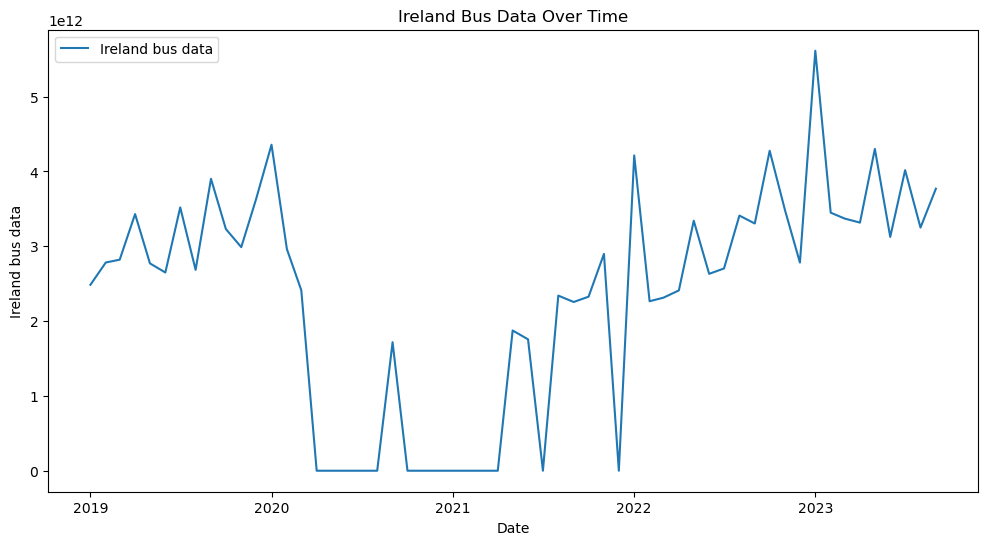

In [50]:
# Line plot for Ireland bus data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Ireland bus data'], label='Ireland bus data')
plt.xlabel('Date')
plt.ylabel('Ireland bus data')
plt.title('Ireland Bus Data Over Time')
plt.legend()
plt.show()

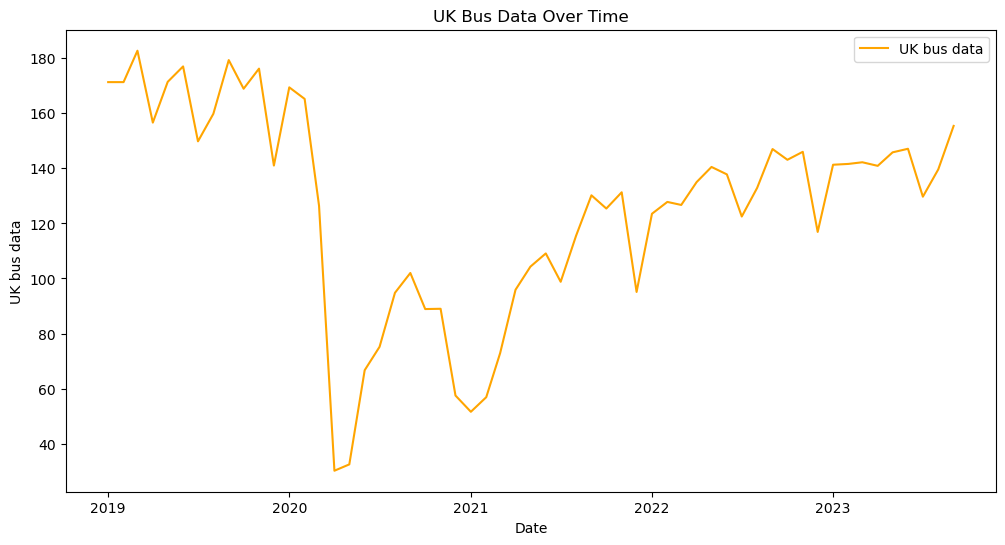

In [51]:
# Line plot for UK bus data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['UK bus data'], label='UK bus data', color='orange')
plt.xlabel('Date')
plt.ylabel('UK bus data')
plt.title('UK Bus Data Over Time')
plt.legend()
plt.show()

In [52]:
# Calculating the sample proportion
total_users = df['Ireland bus data'].count()
users_commuting_to_ireland = df[df['Ireland bus data'] > 0]['Ireland bus data'].count()
sample_proportion = users_commuting_to_ireland / total_users

In [53]:
# Calculating the confidence interval
conf_interval = proportion_confint(users_commuting_to_ireland, total_users)

In [54]:
# Displaying the results
print(f"Sample Proportion: {sample_proportion:.4f}")
print(f"Confidence Interval: ({conf_interval[0]:.4f}, {conf_interval[1]:.4f})")

Sample Proportion: 1.0000
Confidence Interval: (1.0000, 1.0000)


# Independent Samples t-test:

In [55]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df['Ireland bus data'], df['UK bus data'])
print(f"Independent Samples t-test:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Independent Samples t-test:
T-statistic: 11.6961
P-value: 0.0000


# Paired Samples t-test:

In [56]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(df['Ireland bus data'], df['UK bus data'])
print(f"Paired Samples t-test:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Paired Samples t-test:
T-statistic: 11.6961
P-value: 0.0000


# Analysis of Variance (ANOVA):

In [57]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(df['Ireland bus data'], df['UK bus data'])
print(f"Analysis of Variance (ANOVA):")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Analysis of Variance (ANOVA):
F-statistic: 136.7978
P-value: 0.0000


# Wilcoxon Signed-Rank Test (non-parametric):

In [58]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(df['Ireland bus data'], df['UK bus data'])
print(f"Wilcoxon Signed-Rank Test:")
print(f"Wilcoxon statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

Wilcoxon Signed-Rank Test:
Wilcoxon statistic: 0.0000
P-value: 0.0000


# Chi-squared Test:

In [59]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Ireland bus data'], df['UK bus data'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared Test:")
print(f"Chi-squared statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Chi-squared Test:
Chi-squared statistic: 3135.0000
P-value: 0.2404


# Post-hoc Analysis

In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(df['Ireland bus data'], df['UK bus data'])
print(tukey_result.summary())

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
group1 group2     meandiff     p-adj         lower              upper        reject
-----------------------------------------------------------------------------------
  30.2   32.5         124864.0    1.0  -15406270542374.28  15406270792102.28  False
  30.2   51.6         548804.0    1.0  -15406270118434.28  15406271216042.28  False
  30.2   56.9         465820.0    1.0  -15406270201418.28  15406271133058.28  False
  30.2   57.5        1198065.0    1.0 -15406269469173.277 15406271865303.277  False
  30.2   66.7         706461.0    1.0 -15406269960777.277 15406271373699.277  False
  30.2   72.9         881609.0    1.0 -15406269785629.277 15406271548847.277  False
  30.2   75.2         986468.0    1.0  -15406269680770.28  15406271653706.28  False
  30.2   88.9        1179666.0    1.0  -15406269487572.28  15406271846904.28  False
  30.2   89.0        1031257.0    1.0 -15406269635981.277 15406271698495.277

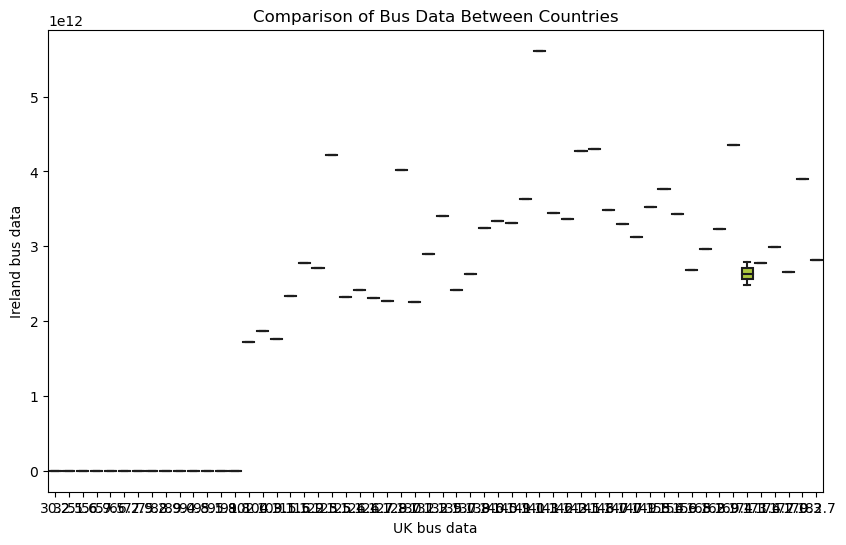

In [61]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='UK bus data', y='Ireland bus data', data=df, palette='viridis')

plt.xlabel('UK bus data')
plt.ylabel('Ireland bus data')
plt.title('Comparison of Bus Data Between Countries')

plt.show()

In [62]:
correlation_matrix = df.corr()
print(correlation_matrix)

                  Ireland bus data  UK bus data
Ireland bus data           1.00000      0.80542
UK bus data                0.80542      1.00000


# Machine Learning 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [64]:
features = ['Ireland bus data', 'UK bus data']
target = 'Ireland bus data'